# Collisions Data by SDOT

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
import pandas_profiling as pp
# handling imbalance sampling
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)
df=pd.read_csv('C://Users/S13141/Downloads/dataCollisions.csv')
df.head()

C:\Users\S13141\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


# EDA

count    194673.000000
mean          1.298901
std           0.457778
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: SEVERITYCODE, dtype: float64


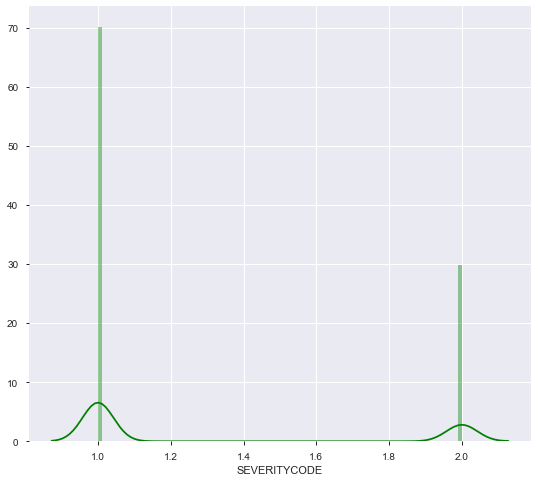

In [3]:
print(df['SEVERITYCODE'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SEVERITYCODE'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [4]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [5]:
df_num = df.select_dtypes(include = ['float64', 'int64']).copy()
df_num.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
0,2,-122.323148,47.703140,1,1307,1307,37475.0,2,2,0,0,2,11,NaN,0,0
1,1,-122.347294,47.647172,2,52200,52200,NaN,1,2,0,0,2,16,6354039.0,0,0
2,1,-122.334540,47.607871,3,26700,26700,NaN,1,4,0,0,3,14,4323031.0,0,0
3,1,-122.334803,47.604803,4,1144,1144,NaN,1,3,0,0,3,11,NaN,0,0
4,2,-122.306426,47.545739,5,17700,17700,34387.0,2,2,0,0,2,11,4028032.0,0,0


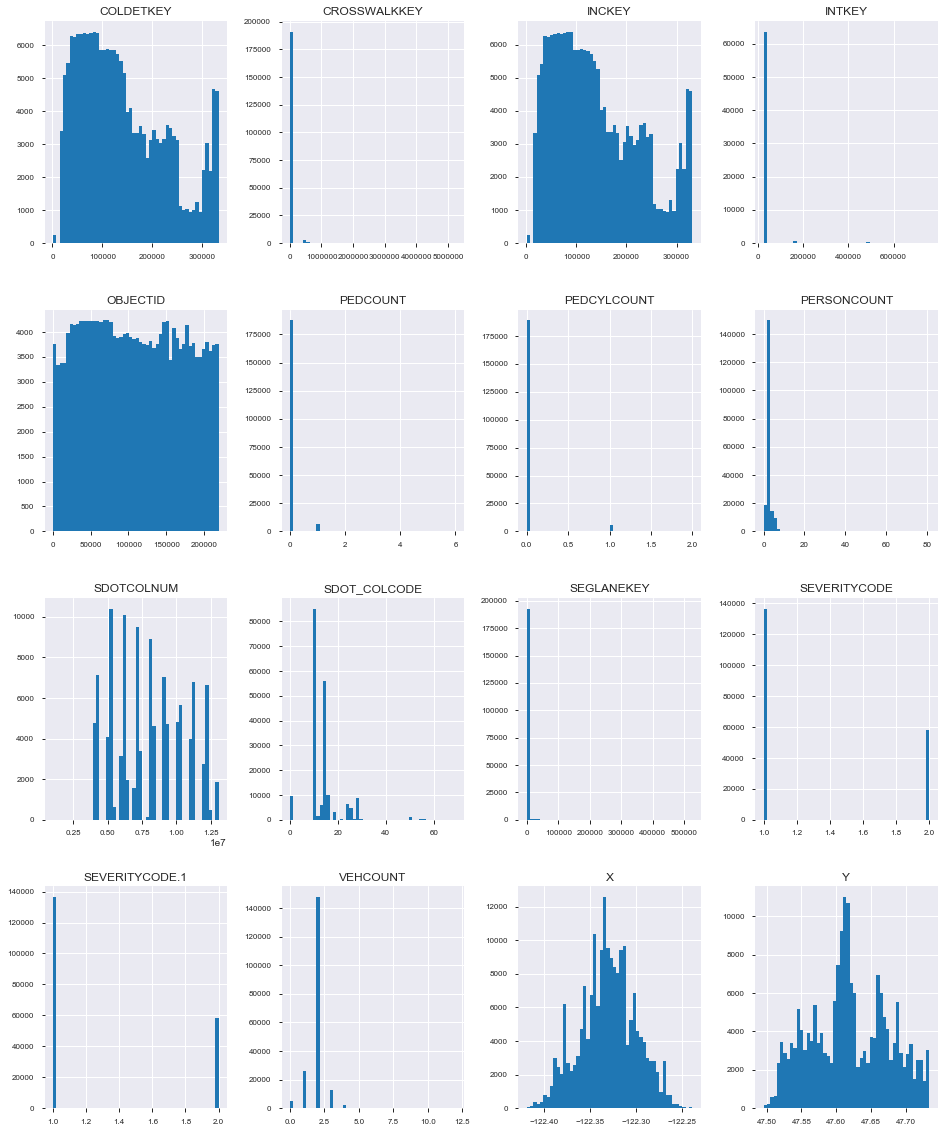

In [6]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

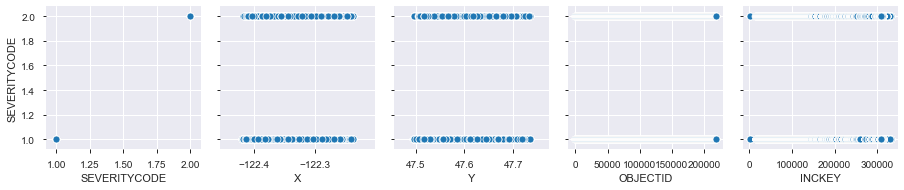

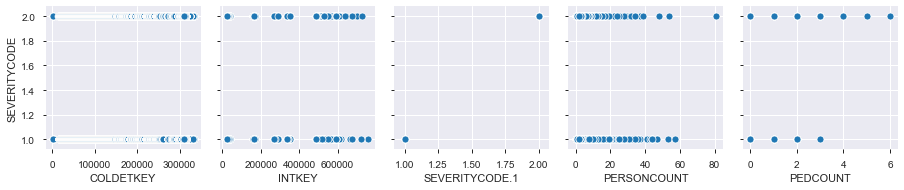

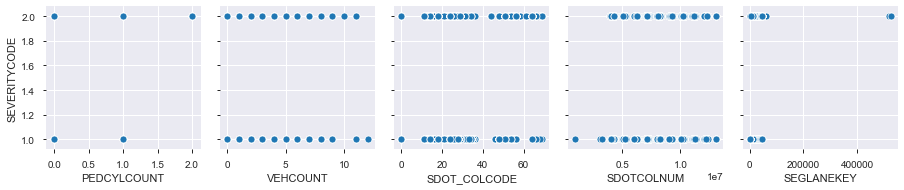

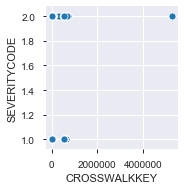

In [7]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SEVERITYCODE'])

In [8]:
df_cat = df.select_dtypes(include = 'O').copy()
df_cat['SEVERITYCODE']=df['SEVERITYCODE'].copy()
cols=df_cat.columns.to_list()
cols=cols[-1:]+cols[:-1]
df_cat=df_cat[cols]
df_cat.head()

,SEVERITYCODE,REPORTNO,STATUS,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYDESC,COLLISIONTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,3502005,Matched,Intersection,5TH AVE NE AND NE 103RD ST,,NaN,Injury Collision,Angles,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,10,Entering at angle,N
1,1,2607959,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,Property Damage Only Collision,Sideswipe,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,From same direction - both going straight - bo...,N
2,1,1482393,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,Property Damage Only Collision,Parked Car,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,NaN,32,One parked--one moving,N
3,1,3503937,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,Property Damage Only Collision,Other,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,23,From same direction - all others,N
4,2,1807429,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,Injury Collision,Angles,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,NaN,10,Entering at angle,N


In [9]:
# output_filename = 'ibmDataScienceCapstone.html'
# profile = pp.ProfileReport(df, title='EDA of Collisions Data by SDOT')
# profile.to_file(output_file=output_filename)

In [10]:
print(df.dtypes)

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

Text(0.5, 1.0, 'Accident Severity (imbalanced)')

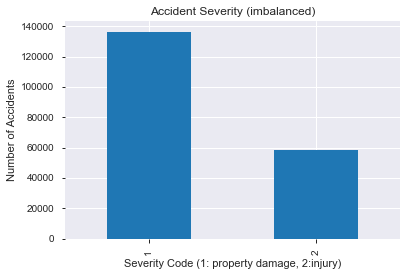

In [11]:
df.SEVERITYCODE.value_counts().plot(kind='bar')
plt.xlabel('Severity Code (1: property damage, 2:injury)') 
plt.ylabel('Number of Accidents') 
plt.title('Accident Severity (imbalanced)')

In [12]:
#Descriptive Stats
descriptive_stats= df.describe(include="all")
descriptive_stats

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,191996,84811,5638,194673.000000,194673,189769,194673.000000,194673.000000,194673.000000,194673.000000,194673,194673,188344,194673.000000,194673,29805,189789,189592,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,24102,2,1,NaN,2,10,NaN,NaN,NaN,NaN,5985,162058,7,NaN,39,1,4,11,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,,"Not Enough Information, or Insufficient Locati...",NaN,Property Damage Only Collision,Parked Car,NaN,NaN,NaN,NaN,2006/11/02 00:00:00+00,11/2/2006,Mid-Block (not related to intersection),NaN,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,N,Clear,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,276,79173,5638,NaN,136485,47987,NaN,NaN,NaN,NaN,96,96,89800,NaN,85209,29805,100274,111135,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,NaN,NaN,NaN,1.298901,NaN,NaN,2.444427,0.037139,0.028391,1.920780,NaN,NaN,NaN,13.867768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,NaN,NaN,NaN,0.457778,NaN,NaN,1.345929,0.198150,0.167413,0.631047,NaN,NaN,NaN,6.868755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,NaN,NaN,NaN,2.000000,NaN,NaN,3.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [13]:
# summarize class distribution
counter = Counter(df['SEVERITYCODE'])
print(counter)

Counter({1: 136485, 2: 58188})


# Data Balancing and Cleansing

In [14]:
df1 = df.drop(["LOCATION", "SEVERITYCODE.1", "OBJECTID", "INCKEY", "COLDETKEY", "REPORTNO", "INTKEY", 
          "EXCEPTRSNCODE", "SDOT_COLCODE", "ST_COLCODE", "SEGLANEKEY", "CROSSWALKKEY", "SDOTCOLNUM", 
          "STATUS", "EXCEPTRSNDESC", "INCDATE", "INCDTTM", "SDOT_COLDESC", "PEDROWNOTGRNT", "UNDERINFL", 
        "PEDCYLCOUNT", "HITPARKEDCAR", "ST_COLDESC", "SEVERITYDESC", "ADDRTYPE", "COLLISIONTYPE", "PEDCOUNT"], axis=1)
df1.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,2,2,At Intersection (intersection related),NaN,Overcast,Wet,Daylight,NaN
1,1,-122.347294,47.647172,2,2,Mid-Block (not related to intersection),NaN,Raining,Wet,Dark - Street Lights On,NaN
2,1,-122.334540,47.607871,4,3,Mid-Block (not related to intersection),NaN,Overcast,Dry,Daylight,NaN
3,1,-122.334803,47.604803,3,3,Mid-Block (not related to intersection),NaN,Clear,Dry,Daylight,NaN
4,2,-122.306426,47.545739,2,2,At Intersection (intersection related),NaN,Raining,Wet,Daylight,NaN


In [15]:

from sklearn.utils import resample
df1_maj = df1[df1.SEVERITYCODE==1]
df1_min = df1[df1.SEVERITYCODE==2]

# Upsample minority class
df1_min_upsampled = resample(df1_min, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df1_maj),    # to match majority class
                                 random_state=27) # reproducible results

# Combine majority class with upsampled minority class
df1_upsampled = pd.concat([df1_maj, df1_min_upsampled])

# Display new class counts
print('severity column', df1_upsampled.SEVERITYCODE.value_counts())


severity column 2    136485
1    136485
Name: SEVERITYCODE, dtype: int64


Text(0.5, 1.0, 'Accident Severity (balanced)')

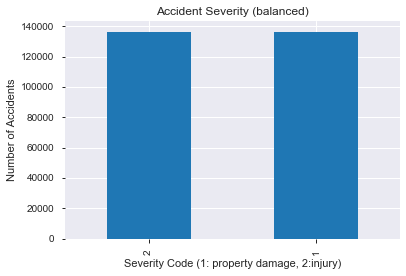

In [16]:
df1_upsampled.SEVERITYCODE.value_counts().plot(kind='bar')
plt.xlabel('Severity Code (1: property damage, 2:injury)') 
plt.ylabel('Number of Accidents') 
plt.title('Accident Severity (balanced)')

# OneHotEncoding, Data Scaling and Splitting the data to Training and Testing Dataset

In [110]:
df1_upsampled.isna().sum()

SEVERITYCODE      0
X                 0
Y                 0
PERSONCOUNT       0
VEHCOUNT          0
JUNCTIONTYPE      0
INATTENTIONIND    0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
dtype: int64

In [111]:
feature_names=list(df1_upsampled.columns)[1:]
feature_names

['X',
 'Y',
 'PERSONCOUNT',
 'VEHCOUNT',
 'JUNCTIONTYPE',
 'INATTENTIONIND',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'SPEEDING']

In [112]:
for nama in feature_names:
    df1_upsampled[nama] = np.where(df1_upsampled[nama].isnull(), "NA", df1_upsampled[nama])
    
df1_upsampled.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
1,1,-122.3472943,47.64717249,2,2,Mid-Block (not related to intersection),NA,Raining,Wet,Dark - Street Lights On,NA
2,1,-122.33453999999999,47.60787143,4,3,Mid-Block (not related to intersection),NA,Overcast,Dry,Daylight,NA
3,1,-122.3348033,47.60480289,3,3,Mid-Block (not related to intersection),NA,Clear,Dry,Daylight,NA
5,1,-122.38759809999999,47.69057545,2,2,At Intersection (intersection related),NA,Clear,Dry,Daylight,NA
6,1,-122.33848459999999,47.61853427,2,2,At Intersection (intersection related),NA,Raining,Wet,Daylight,NA


In [113]:
X = df1_upsampled[feature_names]
y = df1_upsampled['SEVERITYCODE']

In [114]:
X.dtypes

X                 object
Y                 object
PERSONCOUNT       object
VEHCOUNT          object
JUNCTIONTYPE      object
INATTENTIONIND    object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
SPEEDING          object
dtype: object

In [115]:
y.dtypes

dtype('int64')

In [116]:
X = X.select_dtypes(include = 'O')
X

,X,Y,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
1,-122.3472943,47.64717249,2,2,Mid-Block (not related to intersection),NA,Raining,Wet,Dark - Street Lights On,NA
2,-122.33453999999999,47.60787143,4,3,Mid-Block (not related to intersection),NA,Overcast,Dry,Daylight,NA
3,-122.3348033,47.60480289,3,3,Mid-Block (not related to intersection),NA,Clear,Dry,Daylight,NA
5,-122.38759809999999,47.69057545,2,2,At Intersection (intersection related),NA,Clear,Dry,Daylight,NA
6,-122.33848459999999,47.61853427,2,2,At Intersection (intersection related),NA,Raining,Wet,Daylight,NA
...,...,...,...,...,...,...,...,...,...,...
22031,-122.3206996,47.71402903,2,2,At Intersection (intersection related),NA,Raining,Wet,Dark - Street Lights On,NA
87387,-122.36064259999999,47.62270642,3,1,Mid-Block (not related to intersection),NA,Overcast,Dry,Daylight,NA
183492,-122.3485616,47.6905749,3,2,Driveway Junction,NA,Raining,Wet,Dark - Street Lights On,Y
178905,-122.3159446,47.65361705,2,2,Mid-Block (not related to intersection),Y,Clear,Dry,Daylight,NA


In [117]:
# X=X.values
# y=y.values
print("X: " + str(type(X)))
print("y: " + str(type(y)))

X: <class 'pandas.core.frame.DataFrame'>
y: <class 'pandas.core.series.Series'>


In [118]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

for nama in feature_names:
    X[nama] = lb_make.fit_transform(X[nama])
X.head(11)


,X,Y,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
1,15274,14346,12,5,4,0,7,9,2,0
2,12874,9468,32,6,4,0,5,0,5,0
3,12916,9122,23,6,4,0,1,0,5,0
5,21803,20740,12,5,1,0,1,0,5,0
6,13606,10980,12,5,1,0,7,9,5,0
8,13147,9968,12,5,4,0,1,0,5,0
10,23469,23745,12,5,2,0,5,0,5,0
11,12649,3417,12,5,1,0,1,0,5,0
12,17062,5954,0,5,4,0,7,9,2,0
13,10487,9319,12,5,4,0,7,9,0,0


In [119]:
X= X.values
X[:5]

array([[15274, 14346,    12,     5,     4,     0,     7,     9,     2,
            0],
       [12874,  9468,    32,     6,     4,     0,     5,     0,     5,
            0],
       [12916,  9122,    23,     6,     4,     0,     1,     0,     5,
            0],
       [21803, 20740,    12,     5,     1,     0,     1,     0,     5,
            0],
       [13606, 10980,    12,     5,     1,     0,     7,     9,     5,
            0]])

In [120]:
y = lb_make.fit_transform(y)
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [121]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Classification

## Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.65
Accuracy of Logistic regression classifier on test set: 0.65


## Decision Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.95
Accuracy of Decision Tree classifier on test set: 0.80


## KNN

In [127]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.71


## Linear Discriminant Analysis

In [128]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.65
Accuracy of LDA classifier on test set: 0.65


## Gaussian Naive Bayes

In [129]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.64
Accuracy of GNB classifier on test set: 0.65


## Support Vector Machine

In [130]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.67
Accuracy of SVM classifier on test set: 0.67


# Conclusion

From the conclusion above, it could be concluded that Decision Tree is the best model with accuracy of 80% on testing dataset